<a href="https://colab.research.google.com/github/ArtemBurenok/Machine_Learning_Course/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

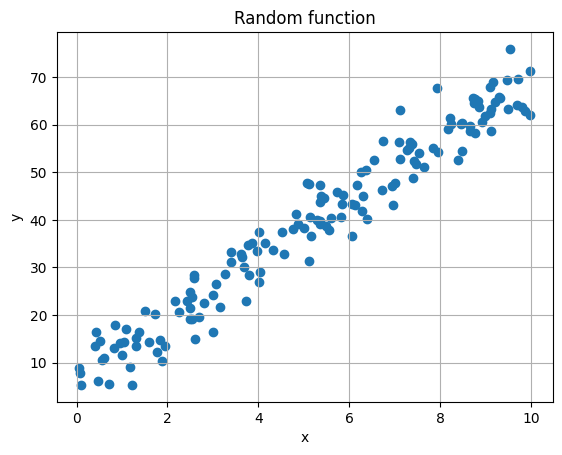

In [ ]:
X = 10 * np.random.rand(150, 1)
y = 6 * X + 8 + np.random.randn(150, 1) * 4

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random function")
plt.grid()
plt.show()

In [ ]:
X_with_b = np.c_[X, np.ones((150, 1))]

**Задача 1.**

Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE +
L2-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [ ]:
def gradient_descent(X, y, iteration = 100, alpha = 0.01):
    theta_grad = np.random.randn(X.shape[1], 1) * 3

    for i in range(iteration):
        grad = 2/ X.shape[0] * X.T.dot(X.dot(theta_grad) - y)
        theta_grad = theta_grad - alpha * grad

    return theta_grad

In [ ]:
theta_grad = gradient_descent(X_with_b, y, iteration=1200)

In [ ]:
theta_grad

array([[6.30784407],
       [6.66520929]])

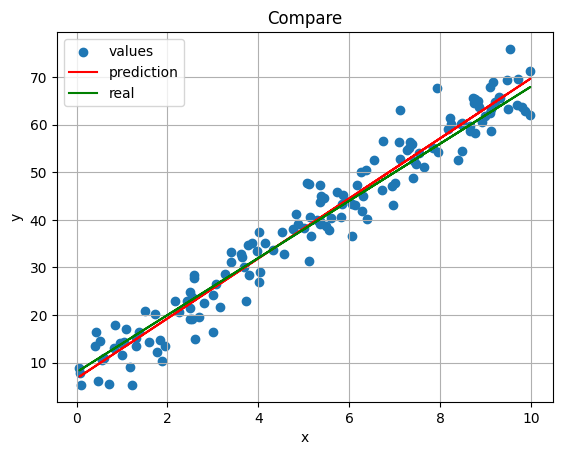

In [ ]:
y_predicted = X_with_b.dot(theta_grad)
plt.scatter(X, y)
plt.plot(X, y_predicted, 'r')
plt.plot(X, 6 * X + 8, 'g')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["values", "prediction", "real"])
plt.title("Compare")
plt.grid()
plt.show()

**Задача 2.**

Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- price).

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/car_price.csv')

**Задача 3.**

 Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).


In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data_without_id = data.drop(['car_ID', 'CarName'], axis=1)

 **Задание 4.**

 Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.


Для начала, я считаю необходимым разделить данные на строковые и числовые. Для числовых данных будут построенны гистограммы, ящики с усами и pairplot.
Для строковых - barplot.

Кроме того, будет построена матрица корелляций.

In [ ]:
discret_values, continuous_values = [], []

for col in data_without_id.columns:
    if data_without_id[col].dtype == 'object':
        discret_values.append(col)
    else:
        continuous_values.append(col)

Анализ числовых переменных

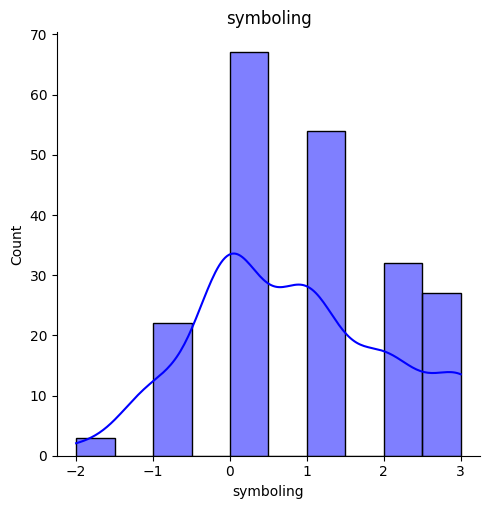

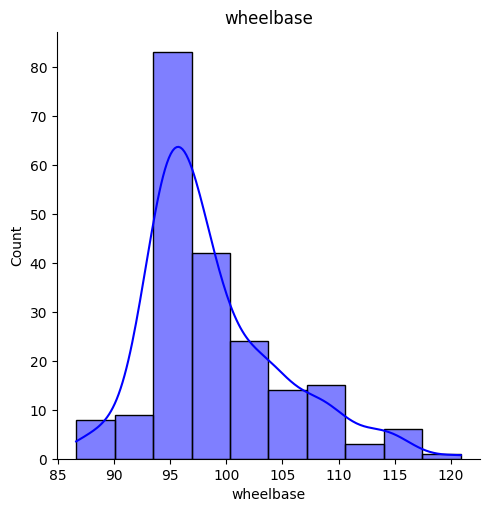

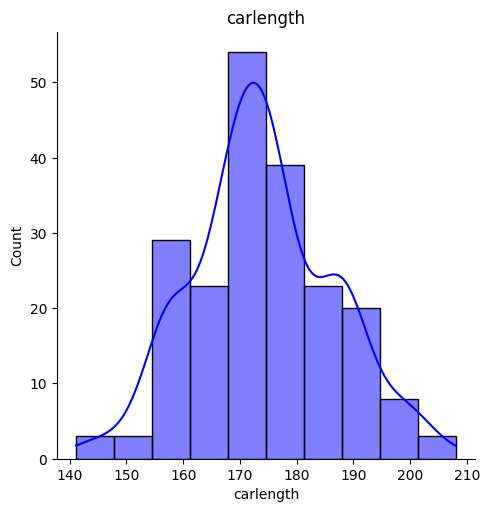

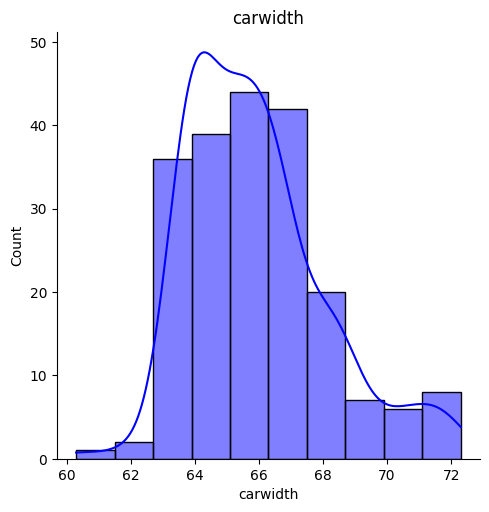

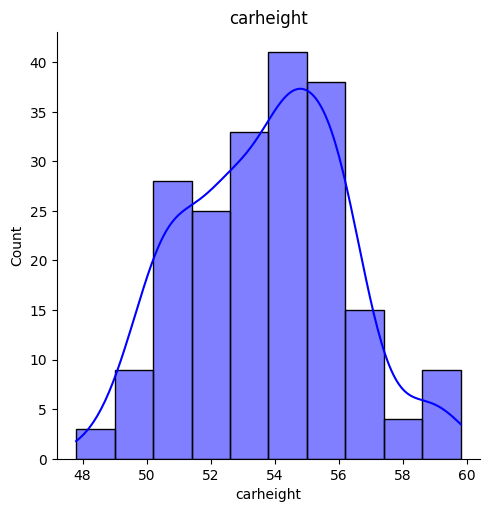

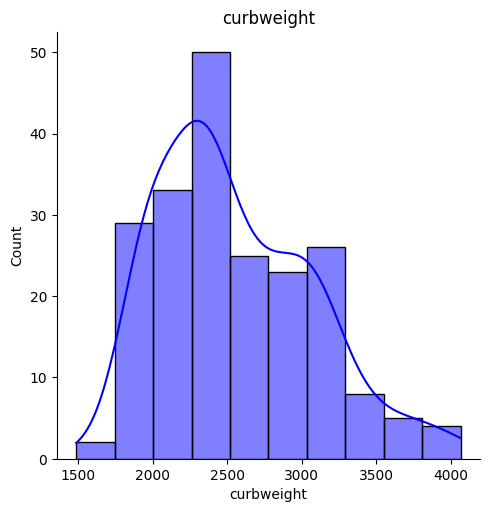

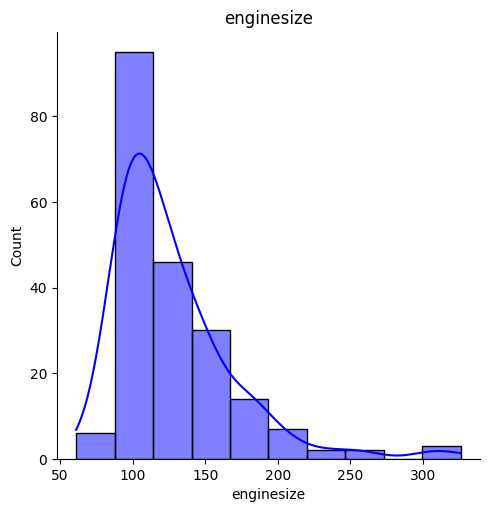

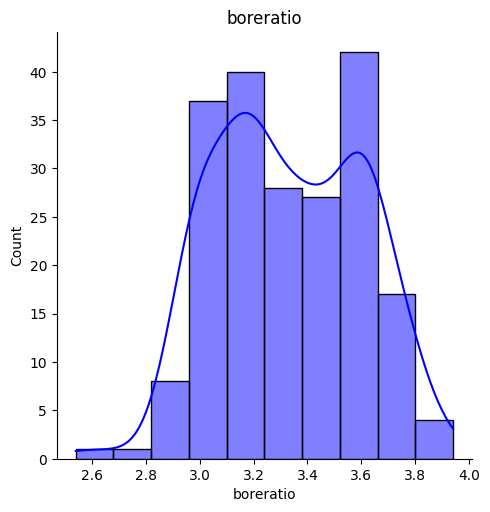

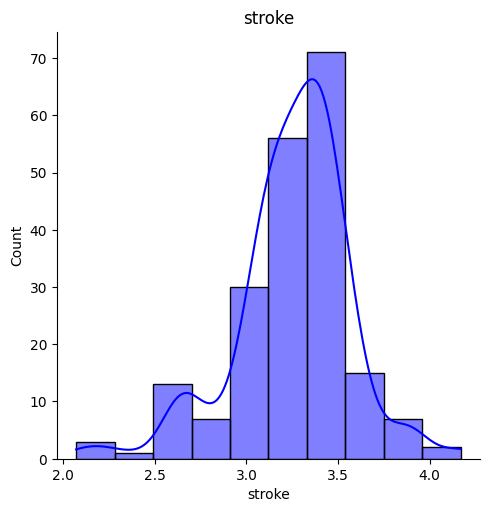

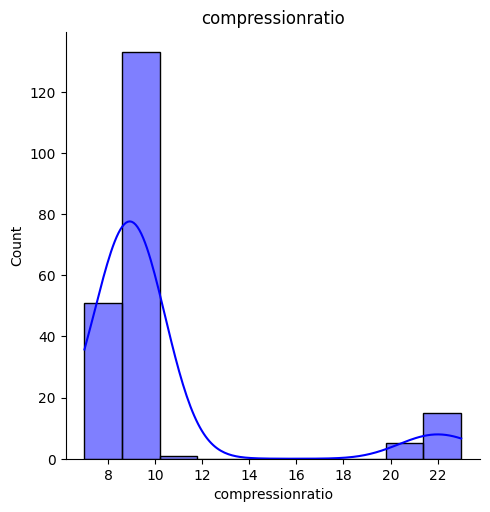

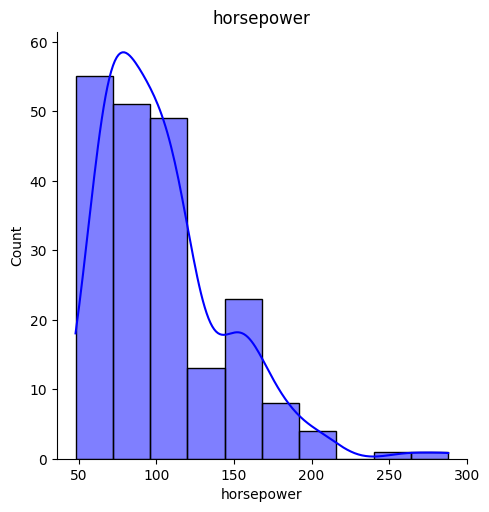

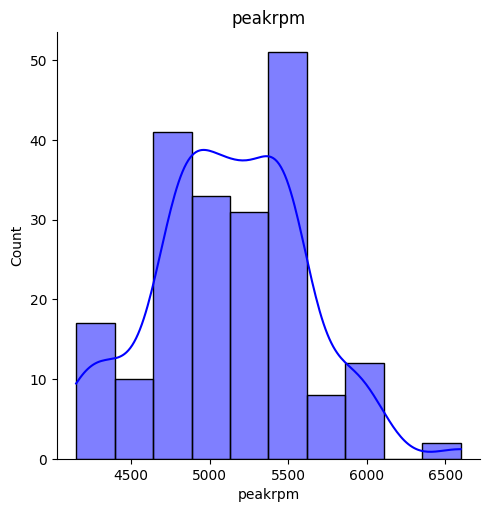

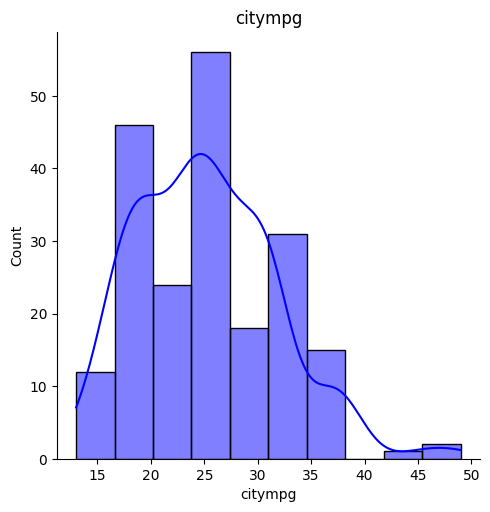

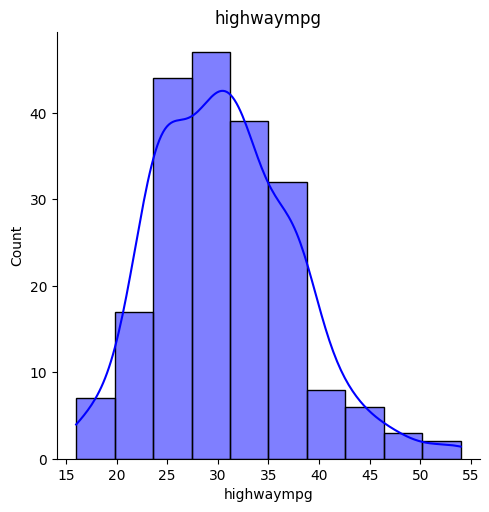

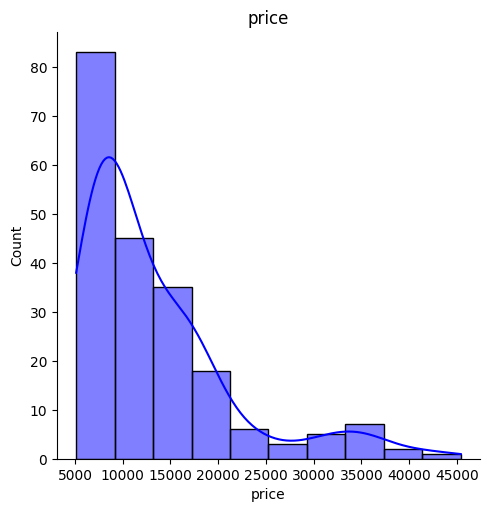

In [ ]:
# гистограммы
for col in continuous_values:
    sns.displot(data_without_id[col], bins=10, color='blue', kde=True)
    plt.title(col)
    plt.show()

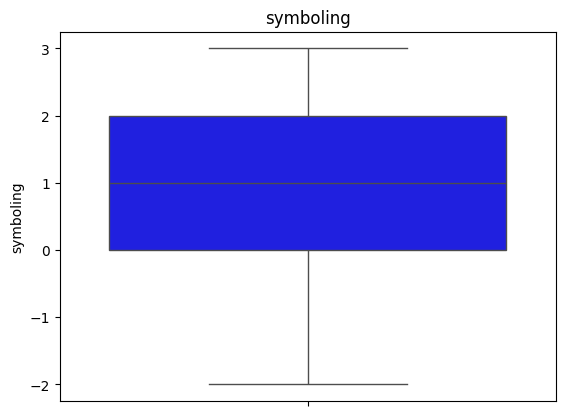

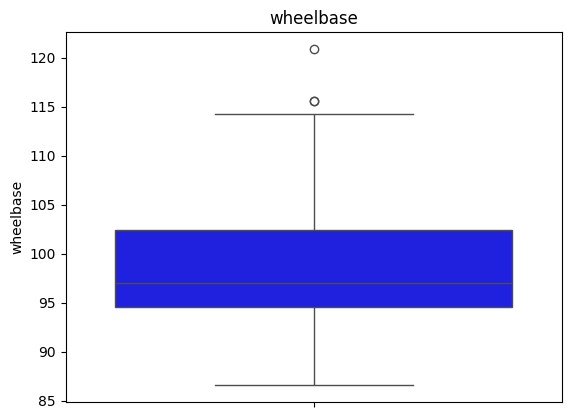

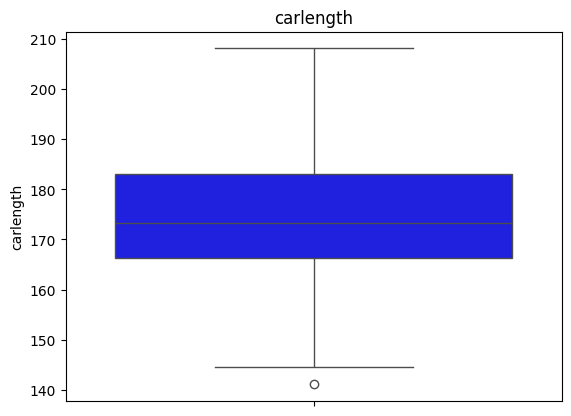

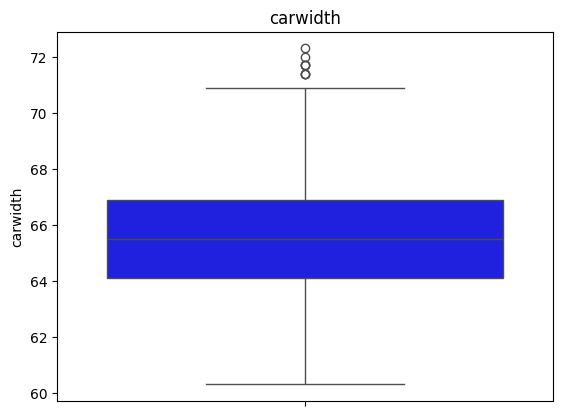

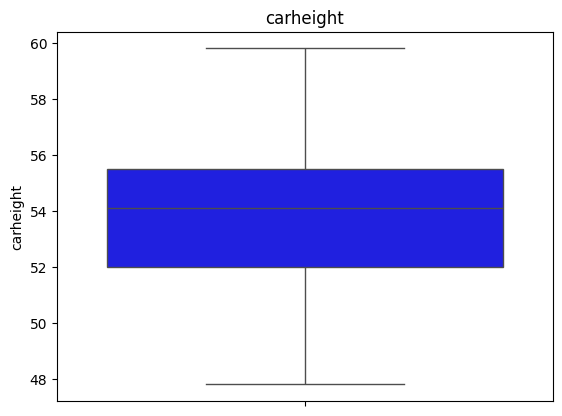

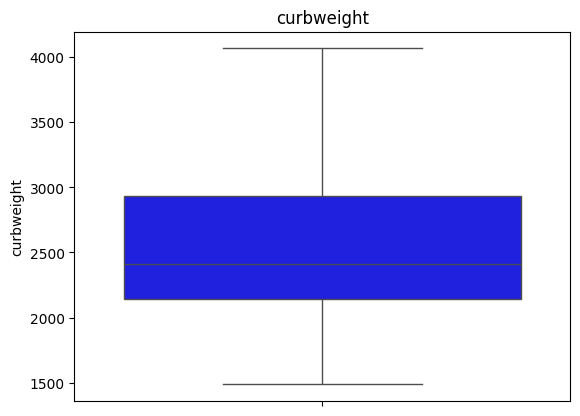

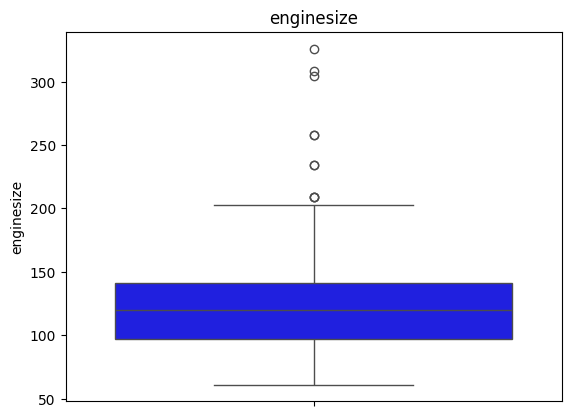

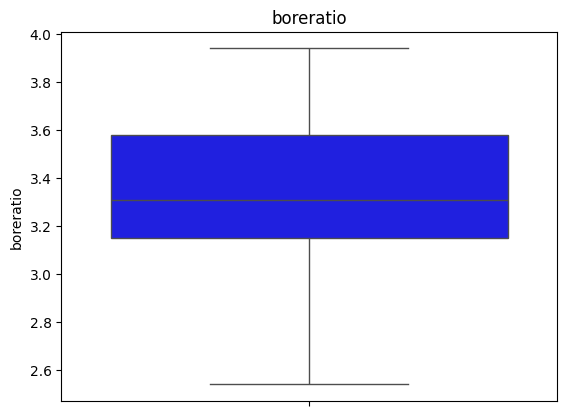

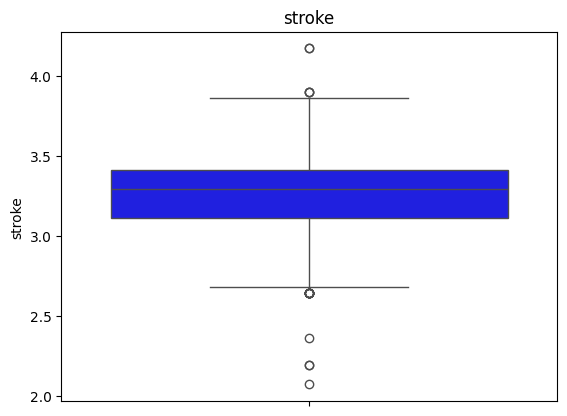

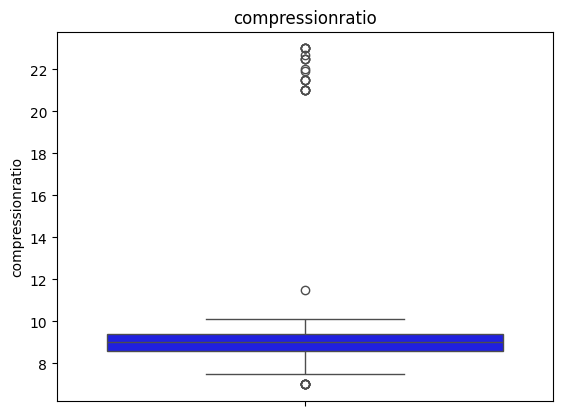

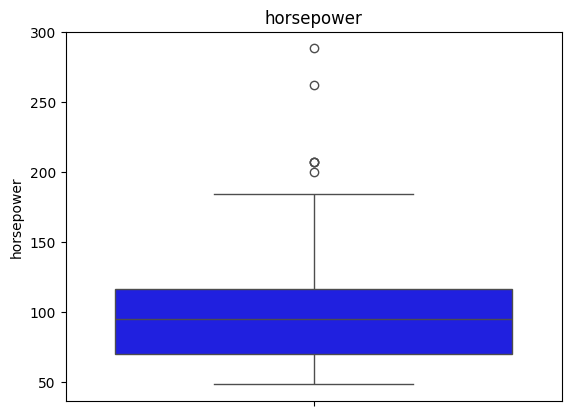

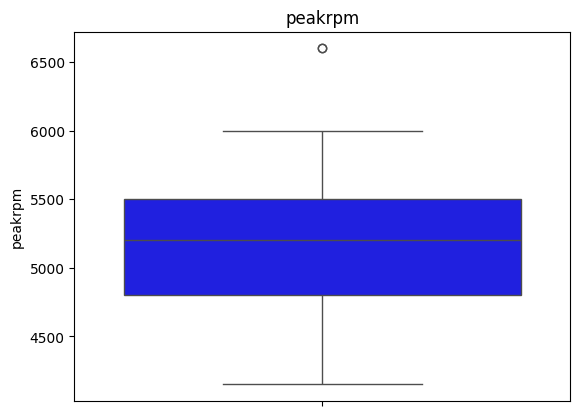

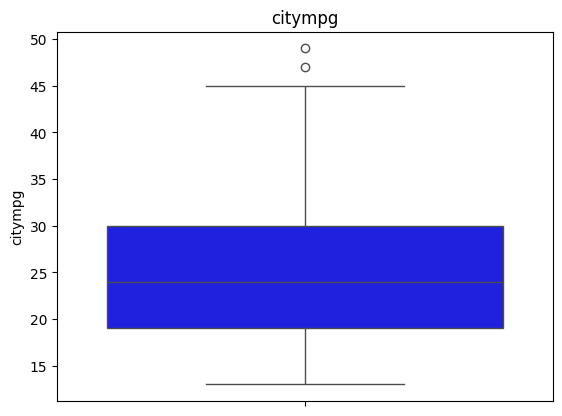

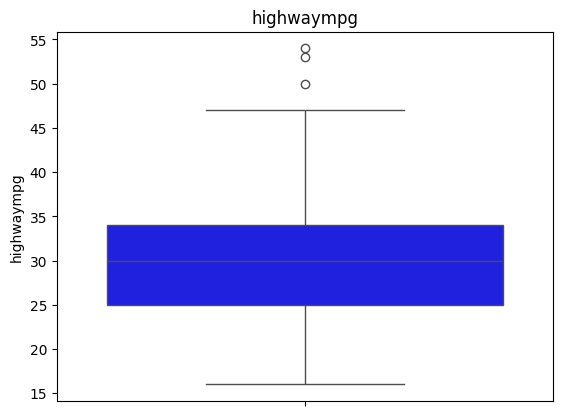

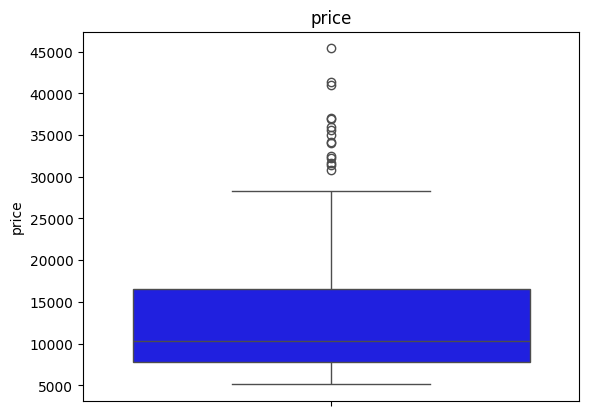

In [ ]:
# boxplot

for col in continuous_values:
    sns.boxplot(data_without_id[col], color='blue')
    plt.title(col)
    plt.show()

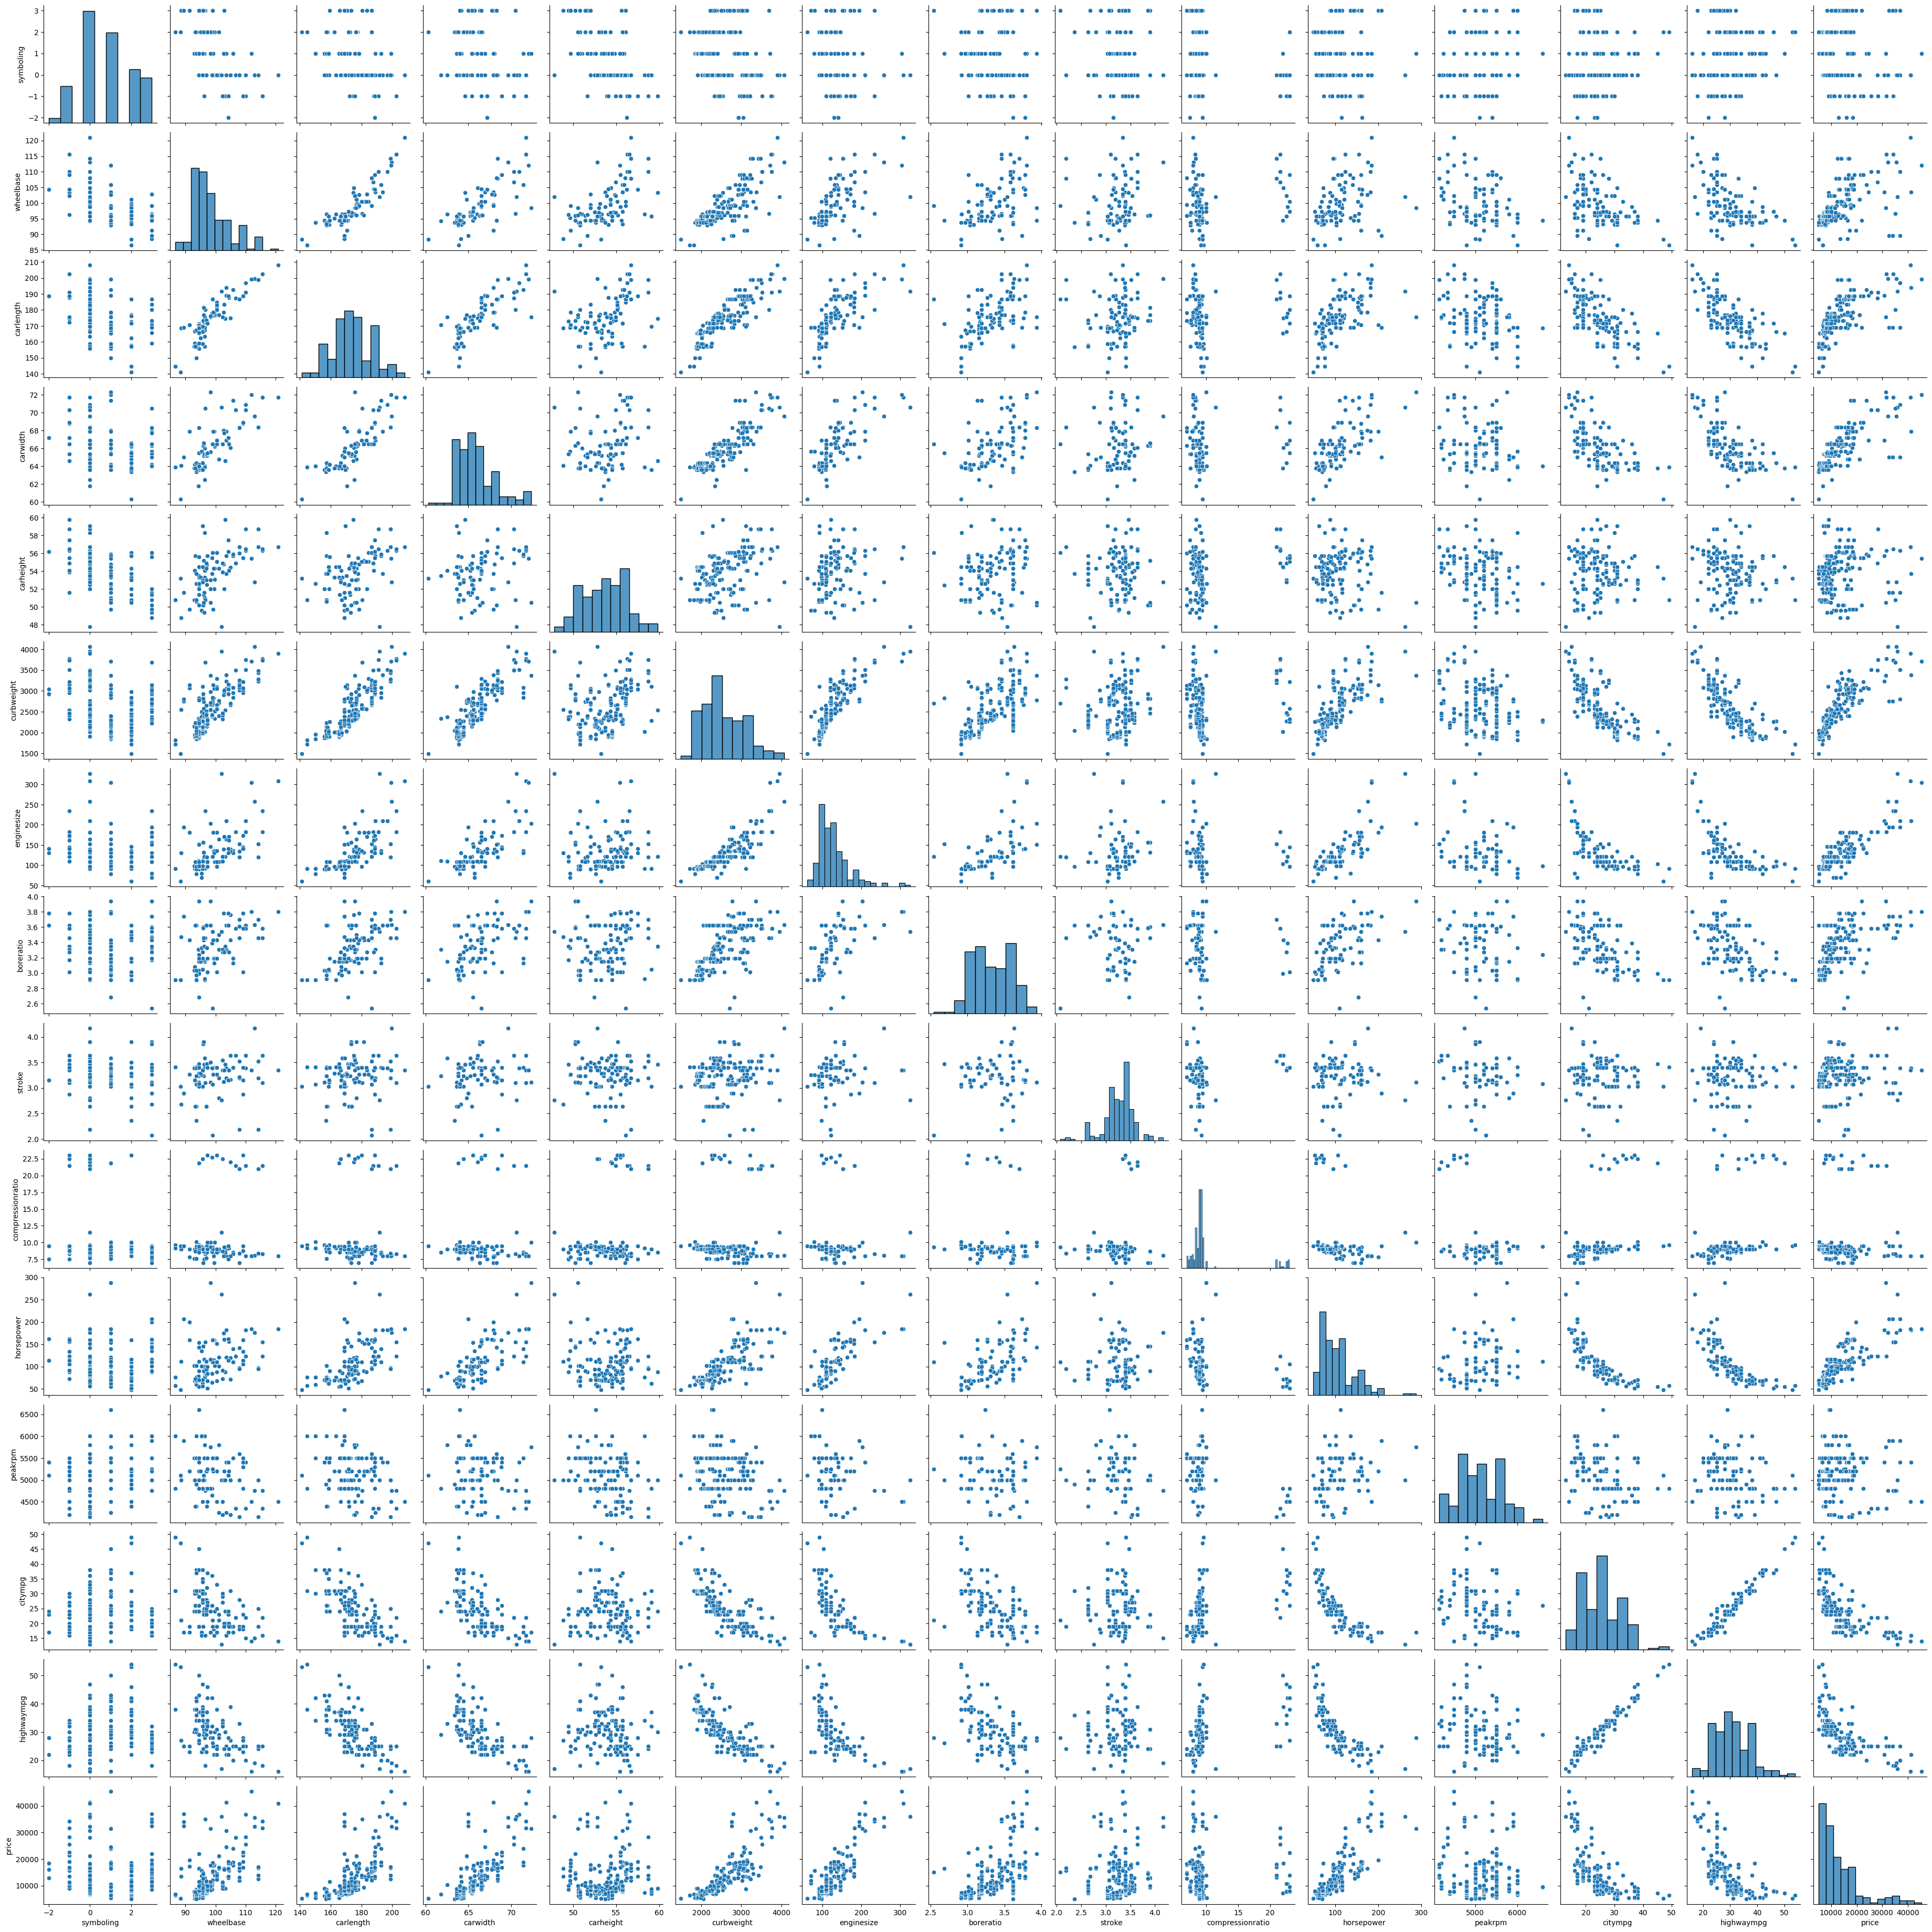

In [ ]:
# pairplot

sns.pairplot(data_without_id[continuous_values])

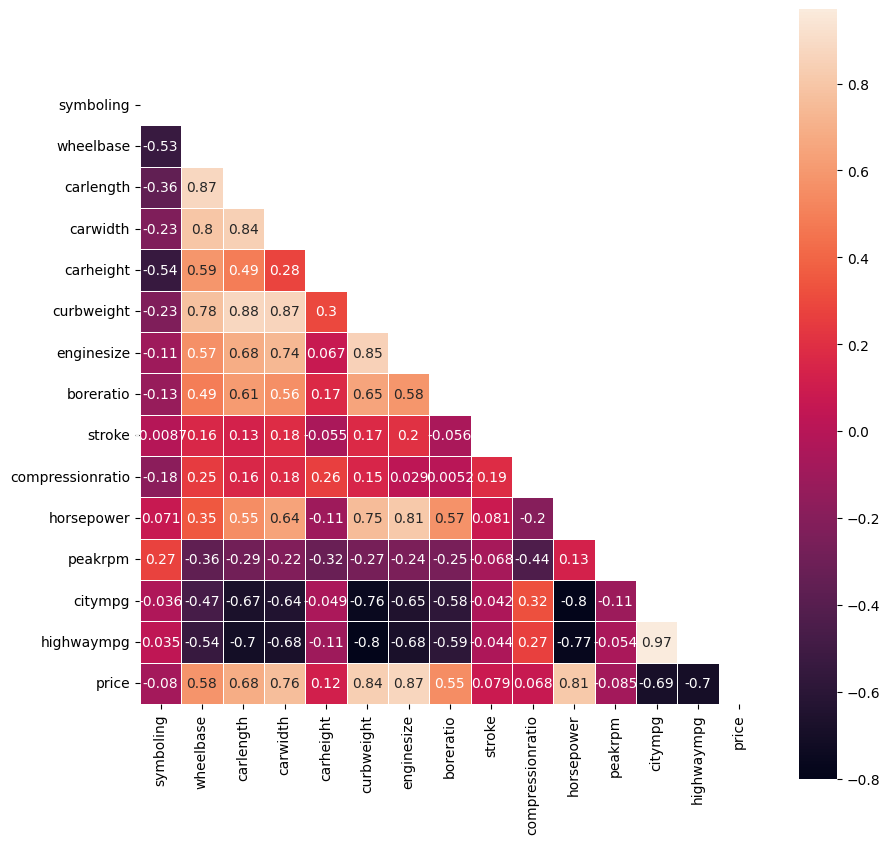

In [ ]:
corr = data_without_id[continuous_values].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

Анализ строковых переменных

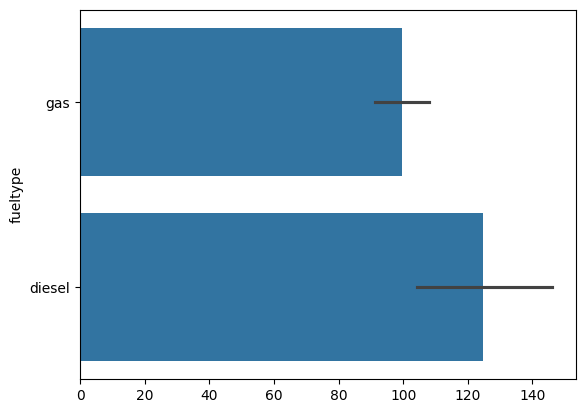

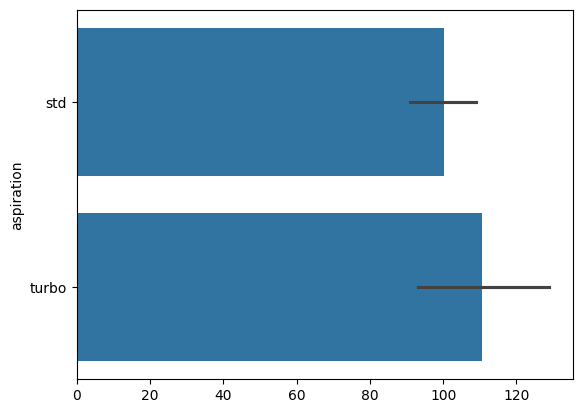

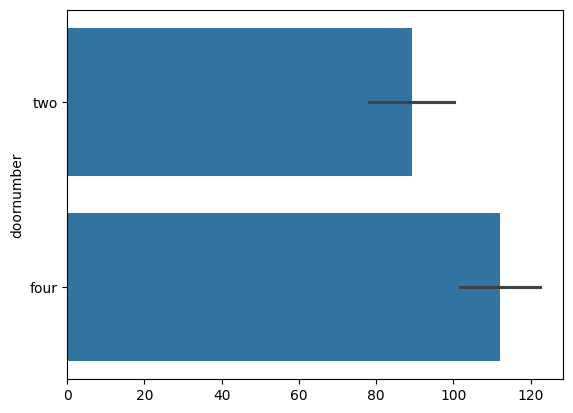

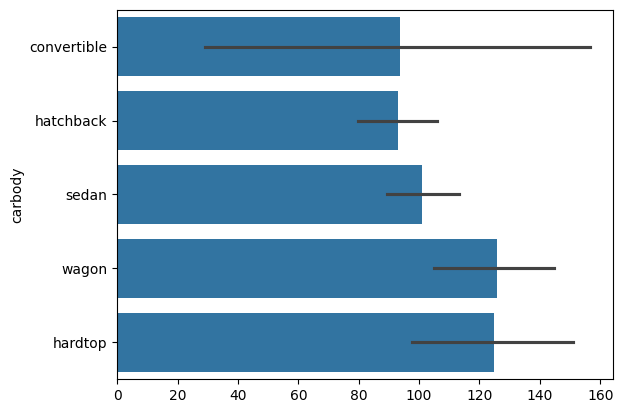

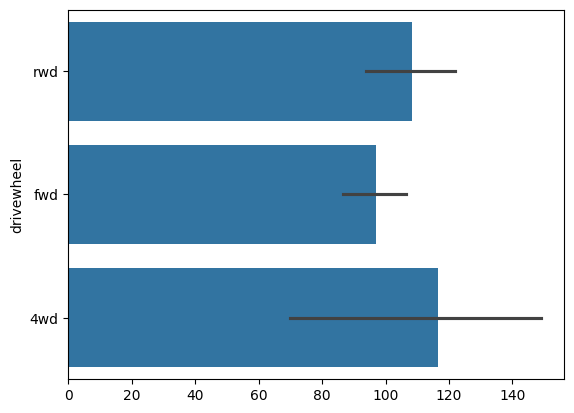

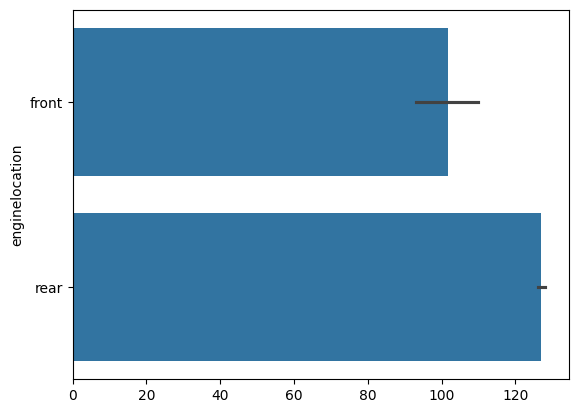

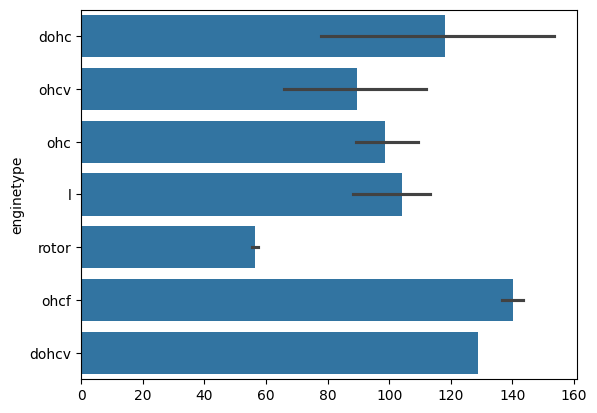

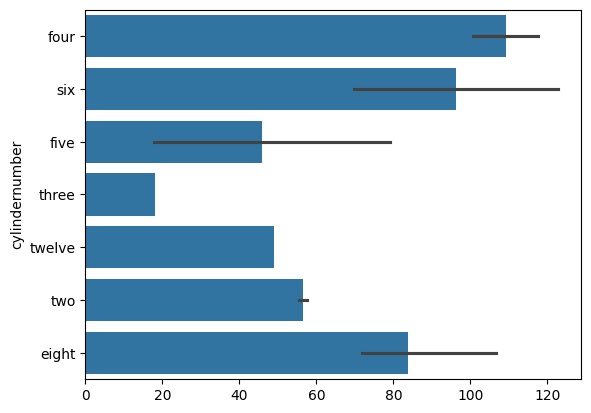

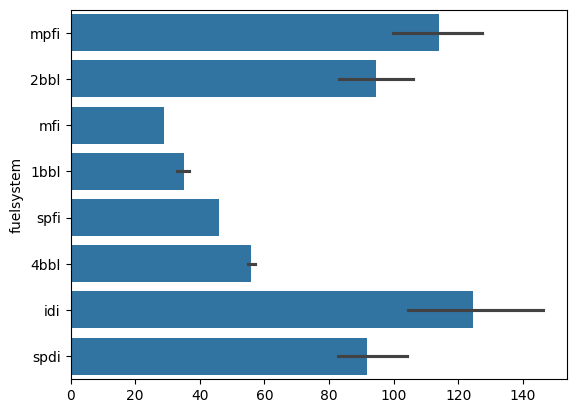

In [ ]:
for col in discret_values:
    sns.barplot(data_without_id[col])
    plt.show()

Выводы по EDA:


*   Судя по гистограммам, признаковые данные распределенны более-менее нормально. Однако в некоторых случаях есть скос влево, можно взять логарифм или сделать преобразование Бокса-Кокса. Скос влево характерен и для целевой переменнй - цены.
*   Pairplot показывает сильную нелинейную зависимость фичей и таргета. Кроме того, есть зависимости и внутри признаковых переменных (это видно и по матрице корреляций), что приводит к мультиколлинеарности.
*   Категориальные строковые переменные в основном сбалансированы, однако признаки enginetype, cylindernumber и fuelsystem не слишком сбалансированы. Неплохо было бы получить ещё данные, но в целом не критично.



**Задание 5.**

При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [ ]:
for col in discret_values:
    label = LabelEncoder()
    data_without_id[col] = label.fit_transform(data_without_id[col].values)

In [ ]:
data_without_id.sample(6)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
142,0,1,0,0,3,1,0,97.2,172.0,65.4,...,108,1,3.62,2.64,9.5,82,4400,28,33,7775.0
113,0,1,0,0,4,2,0,114.2,198.9,68.4,...,120,5,3.46,2.19,8.4,95,5000,19,24,16695.0
78,2,1,0,1,2,1,0,93.7,157.3,64.4,...,92,1,2.97,3.23,9.4,68,5500,31,38,6669.0
102,0,1,0,0,4,1,0,100.4,184.6,66.5,...,181,5,3.43,3.27,9.0,152,5200,17,22,14399.0
13,0,1,0,0,3,2,0,101.2,176.8,64.8,...,164,5,3.31,3.19,9.0,121,4250,21,28,21105.0
150,1,1,0,1,2,1,0,95.7,158.7,63.6,...,92,1,3.05,3.03,9.0,62,4800,35,39,5348.0


Необходимо убрать ненужные признаки. Для этого будет использоваться F-тест.

In [ ]:
f_statistic, p_value = f_regression(data_without_id.drop("price", axis=1), data_without_id['price'])

In [ ]:
importance_list = []

for i in range(len(data_without_id.drop("price", axis=1).columns)):
    if p_value[i] < 0.05:
        importance_list.append(data_without_id.columns[i])
        print(f"Признак {data_without_id.columns[i]} значим")
    else:
        print(f"Признак {data_without_id.columns[i]} не значим")

Признак symboling не значим
Признак fueltype не значим
Признак aspiration значим
Признак doornumber не значим
Признак carbody не значим
Признак drivewheel значим
Признак enginelocation значим
Признак wheelbase значим
Признак carlength значим
Признак carwidth значим
Признак carheight не значим
Признак curbweight значим
Признак enginetype не значим
Признак cylindernumber не значим
Признак enginesize значим
Признак fuelsystem значим
Признак boreratio значим
Признак stroke не значим
Признак compressionratio не значим
Признак horsepower значим
Признак peakrpm не значим
Признак citympg значим
Признак highwaympg значим


**Задание 6.**

Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_data, y_data = data_without_id.drop("price", axis=1)[importance_list], data_without_id['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

 **Задание 7.**

 При обучении моделей использовать масштабирование данных.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_columns = [col for col in X_train.columns if col not in discret_values]

In [ ]:
for col in scaler_columns:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))

    scaler_test = StandardScaler()
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1, 1))

**Задание 8.**

Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R2.

In [ ]:
weights = gradient_descent(X_train.values, y_train.values.reshape(-1, 1), iteration=10000, alpha=0.01)

In [ ]:
y_prediction = X_train.values.dot(weights)

Оценка с помощью MSE, RMSE, R2.

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [ ]:
def metrics(real_value, y_prediction):
    MSE = mean_squared_error(real_value, y_prediction)
    RMSE = root_mean_squared_error(real_value, y_prediction)
    r2 = r2_score(real_value, y_prediction)

    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")
    print(f"r2_score: {r2}")

    return MSE, RMSE, r2

In [ ]:
print("Train values")
metrics(y_train.values, y_prediction)

Train values
MSE: 15467427.21036084
RMSE: 3932.8650129849157
r2_score: 0.7462260153771132


(15467427.21036084, 3932.8650129849157, 0.7462260153771132)

In [ ]:
weights_test = gradient_descent(X_test.values, y_test.values.reshape(-1, 1), iteration=10000, alpha=0.01)

In [ ]:
y_prediction_test = X_test.values.dot(weights_test)

In [ ]:
print("Test values")
metrics(y_test.values, y_prediction_test)

Test values
MSE: 18412279.562617596
RMSE: 4290.953223074985
r2_score: 0.734250635833506


(18412279.562617596, 4290.953223074985, 0.734250635833506)

**Задание 9.**

 Обучить модель, используя существующую библиотеку.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_model_prediction, y_model_prediction_test = model.predict(X_train), model.predict(X_test)

In [ ]:
print("Train values")
train_metrics_model = metrics(y_train.values, y_model_prediction)

Train values
MSE: 7300897.791983818
RMSE: 2702.017355973832
r2_score: 0.8802142141160303


In [ ]:
print("Test values")
test_metrics_model = metrics(y_test.values, y_model_prediction_test)

Test values
MSE: 12400397.46867072
RMSE: 3521.4198086383735
r2_score: 0.8210217408711477


Реализация из библиотеки sklearn показала лучшие результаты.

**Задание 10.**

Повторить тоже самое, но используя кросс-валидацию.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LinearRegression()

In [ ]:
scores = cross_validate(model, X_train, y_train, scoring=['r2', "neg_mean_squared_error", "neg_root_mean_squared_error"], cv=5)
scores

{'fit_time': array([0.04012203, 0.02919698, 0.00436115, 0.00472975, 0.00514817]),
 'score_time': array([0.02169085, 0.01309776, 0.00508285, 0.00580859, 0.00782657]),
 'test_r2': array([0.85428053, 0.80050865, 0.87515896, 0.83122247, 0.84094549]),
 'test_neg_mean_squared_error': array([ -6019998.06334411,  -6747838.48499516,  -7694622.59510924,
        -12424483.14386603, -14105183.52575901]),
 'test_neg_root_mean_squared_error': array([-2453.56843462, -2597.66019429, -2773.91827477, -3524.83803087,
        -3755.68682477])}

In [ ]:
scores_test = cross_validate(model, X_test, y_test, scoring=['r2', "neg_mean_squared_error", "neg_root_mean_squared_error"], cv=5)
scores_test

{'fit_time': array([0.00766277, 0.01073313, 0.00843549, 0.00521612, 0.00779819]),
 'score_time': array([0.01028681, 0.0051198 , 0.0058074 , 0.00385189, 0.00635576]),
 'test_r2': array([0.92658636, 0.78441025, 0.70120019, 0.6387958 , 0.62675269]),
 'test_neg_mean_squared_error': array([ -4110522.21851066, -30649890.49575209, -14923244.48042816,
         -6425441.3625985 , -25897156.78675401]),
 'test_neg_root_mean_squared_error': array([-2027.44228488, -5536.2343245 , -3863.06154241, -2534.8454317 ,
        -5088.92491463])}

**Задание 11**

Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k - количество фолдов в кросс-валидации, E - мат. ожидание и STD - стандартное отклонение.

In [ ]:
np.round(scores['test_r2'], 2)

array([0.85, 0.8 , 0.88, 0.83, 0.84])

In [ ]:
data_array = np.array([
    - np.round(scores['test_neg_mean_squared_error'], 2),
    - np.round(scores_test['test_neg_mean_squared_error'], 2),
    - np.round(scores['test_neg_root_mean_squared_error'], 2),
    - np.round(scores_test['test_neg_root_mean_squared_error'], 2),
    np.round(scores['test_r2'], 2),
    np.round(scores_test['test_r2'], 2),
])

In [ ]:
score_table = pd.DataFrame(data_array,
                           columns=["Fold1", "Fold2", "Fold3", "Fold4", "Fold5"],
                           index=['mse-train', "mse-test", "rmse-train", "rmse-test", "r2-train", "r2-test"])

In [ ]:
mean_list, std_list = [], []

for index in score_table.index:
    mean_list.append(np.round(np.mean(score_table.loc[index]), 2))
    std_list.append(np.round(np.std(score_table.loc[index]), 2))

In [ ]:
score_table['E'],  score_table['STD'] = mean_list, std_list

In [ ]:
score_table

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,6019998.06,6747838.48,7694622.60,12424483.14,14105183.53,9398425.16,3245086.25
mse-test,4110522.22,30649890.50,14923244.48,6425441.36,25897156.79,16401251.07,10449490.41
rmse-train,2453.57,2597.66,2773.92,3524.84,3755.69,3021.14,520.74
rmse-test,2027.44,5536.23,3863.06,2534.85,5088.92,3810.10,1372.72
r2-train,0.85,0.80,0.88,0.83,0.84,0.84,0.03
r2-test,0.93,0.78,0.70,0.64,0.63,0.74,0.11


**Задание 12.**

(+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
model = LinearRegression()
selector = RFE(model, step=1).fit(X_train, y_train)

In [ ]:
selector.n_features_

6

In [ ]:
selector.support_

array([False,  True,  True, False, False,  True, False,  True, False,
       False,  True, False,  True])

In [ ]:
selected_columns_RFE = [pair[0] for pair in zip(X_train.columns, selector.support_) if pair[1]]

In [ ]:
X_train_new = X_train[selected_columns_RFE]

In [ ]:
model = LinearRegression().fit(X_train_new, y_train)
y_prediction_new = model.predict(X_train_new)

In [ ]:
metrics(y_train.values, y_prediction_new)

MSE: 7606369.669470814
RMSE: 2757.9647694397427
r2_score: 0.8752023388709875


(7606369.669470814, 2757.9647694397427, 0.8752023388709875)

In [ ]:
X_test_new = X_test[selected_columns_RFE]
y_test_prediction_new = model.predict(X_test_new)

In [ ]:
metrics(y_test.values, y_test_prediction_new)

MSE: 13230583.070308585
RMSE: 3637.3868463924186
r2_score: 0.8090394496494041


(13230583.070308585, 3637.3868463924186, 0.8090394496494041)

После исключения признаков с помощью RFE качество модели улучшилось.

**Задание 13**

(+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

Градиентный спуск

In [ ]:
import itertools

In [ ]:
class GradientDescent:
    def __init__(self, X: pd.DataFrame, y: pd.DataFrame):
        self.X = X.values
        self.y = y.values.reshape(-1, 1)

    # метод для обучения на значениях, которые передались в конструкторе
    def fit_weights(self, iteration, alpha):
        theta_grad = np.random.randn(self.X.shape[1], 1) * 3

        for i in range(iteration):
            grad = 2/ self.X.shape[0] * self.X.T.dot(self.X.dot(theta_grad) - self.y)
            theta_grad = theta_grad - alpha * grad

        return theta_grad

    # метрики
    def metrics(self, real_value, y_prediction):
        MSE = mean_squared_error(real_value, y_prediction)
        RMSE = root_mean_squared_error(real_value, y_prediction)
        r2 = r2_score(real_value, y_prediction)

        return MSE, RMSE, r2

    # реализация поиска по сетке
    def param_search(self, iteration_values, alpha_values):
        param_list = [
            iteration_values,
            alpha_values
        ]

        result = list(itertools.product(*param_list)) # декартово произведение параметров

        max_r2, optimal_param = -np.inf, None

        for values in result:
            weights = self.fit_weights(iteration=values[0], alpha=values[1])
            prediction = self.X.dot(weights)

            try:
                _, _, current_r2_score = self.metrics(self.y, prediction)

                if current_r2_score > max_r2:
                    max_r2 = current_r2_score
                    optimal_param = values
            except ValueError:
                continue

        return max_r2, optimal_param

In [ ]:
gd = GradientDescent(X_train, y_train)

In [ ]:
r2, optimal_param = gd.param_search([100, 200, 500, 1000, 1100], [0.1, 0.001, 0.01])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


In [ ]:
r2, optimal_param

(0.7237996430843896, (1100, 0.01))

Гребневая регрессия из sklearn



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'alpha': [0.1, 0.001, 0.01]
}

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, parameters)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.1, 0.001, 0.01]})

In [ ]:
grid_search_ridge.best_estimator_

Ridge(alpha=0.01)

In [ ]:
grid_search_ridge.best_score_, grid_search_ridge.best_params_

(0.8404662534359166, {'alpha': 0.01})

**Задание 14.**

(+1 балл) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

In [ ]:
# шаг градиентного спуска
def stochastic_gradient_step(X: np.array, y: np.array, weights: np.array, train_ind: int, alpha=0.01):
    """
        train_ind: индекс объекта обучающей выборки, по которому считается изменение весов
        alpha: шаг градиентного спуска
    """
    length = y.shape[0]

    grad_list = []

    for i in range(X.shape[1]):
        grad_list.append((np.dot(X[train_ind], weights) - y[train_ind]) * 2 * X[train_ind, i])

    return (weights - alpha / length * np.array(grad_list))

In [ ]:
weights_s = np.random.randn(X_train.shape[1], 1)

stochastic_gradient_step(np.array(X_train), np.array(y_train), weights_s, 3)

array([[-0.44030404],
       [ 1.42297404],
       [-0.38218155],
       [-1.78664547],
       [-2.35103611],
       [-2.75561031],
       [-1.35387391],
       [-0.40614171],
       [-0.81493177],
       [-0.91420834],
       [-1.8598119 ],
       [ 2.05672057],
       [ 2.36200335]])

In [ ]:
# сама реализация стохастического градиентного спуска
def stochastic_gradient_descent(X: np.array, y: np.array, alpha=1e-2, max_iter=1000, min_weight_dist=1e-6):
    """
        X: обучающая выборка
        y: целевой признак
        weight_init: начальные веса
        alpha: коэффициент регуляризации
        max_iter: максимальное число итераций
        min_weight_dist: максимальное евклидово расстояние между векторами весов на соседних шагах, при котором алгоритм прекращает работу
    """
    # Расстояние между векторами весов на соседних шагах большим числом.
    weight_dist = np.inf
    # Вектор весов
    weights = np.random.randn(X.shape[1], 1)

    for i in range(max_iter):
        if weight_dist < min_weight_dist:
            break

        random_index = np.random.randint(X.shape[0]) # случайный индекс объекта обучающей выборки
        updated_weights = stochastic_gradient_step(X, y, weights, random_index, alpha)

        weight_dist = np.linalg.norm(updated_weights - weights)
        weights = updated_weights

    return weights

In [ ]:
stochastic_weights = stochastic_gradient_descent(np.array(X_train), np.array(y_train), alpha=0.1, max_iter=100000)

In [ ]:
metrics(X_train.dot(stochastic_weights), y_train)

MSE: 15645620.722371874
RMSE: 3955.454553192575
r2_score: 0.7480113102933474


(15645620.722371874, 3955.454553192575, 0.7480113102933474)

**Задание 15.**

(+1 балл) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [ ]:
def mini_batch_gradient_descent(X: np.array, y: np.array, iteration=1000, minibatch_size=10, alpha=1e-2):
    weights_s = np.random.randn(X.shape[1], 1)

    for epoch in range(iteration):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

        for i in range(0, X.shape[0], minibatch_size):
            x_i, y_i = X_shuffled[i: i + minibatch_size], y_shuffled[i: i + minibatch_size]

            grad = 2 / minibatch_size * x_i.T.dot(x_i.dot(weights_s) - y_i)
            weights_s = weights_s - alpha * grad

    return weights_s

In [ ]:
mini_batch_weights = mini_batch_gradient_descent(np.array(X_train), np.array(y_train).reshape(-1, 1), minibatch_size=11, iteration=1000)

In [ ]:
metrics(X_train.dot(mini_batch_weights), y_train)

MSE: 15914406.88682781
RMSE: 3989.286513504365
r2_score: 0.7717736695478947


(15914406.88682781, 3989.286513504365, 0.7717736695478947)

### Итог

В конце сравним реализованные методы с помощью метрик MSE, RMSE, R2. Методы, которые будут анализированы:

*   LinearRegression
*   Ridge
*   gradient_descent
*   stochastic_gradient_descent
*   mini_batch_gradient_descent



In [ ]:
def cross_validation_analtsis(model, X_train, y_train, X_test, y_test):
    scores = cross_validate(model, X_train, y_train, scoring=['r2', "neg_mean_squared_error", "neg_root_mean_squared_error"], cv=5)
    scores_test = cross_validate(model, X_test, y_test, scoring=['r2', "neg_mean_squared_error", "neg_root_mean_squared_error"], cv=5)

    data_array = np.array([
        - scores['test_neg_mean_squared_error'],
        - scores_test['test_neg_mean_squared_error'],
        - scores['test_neg_root_mean_squared_error'],
        - scores_test['test_neg_root_mean_squared_error'],
        scores['test_r2'],
        scores_test['test_r2'],
    ])

    return [np.round(digit, 2) for digit in np.mean(data_array, axis=1)]

Градиентный спуск

In [ ]:
gd_train = GradientDescent(X_train, y_train)
weight_grad = gd_train.fit_weights(iteration=10000, alpha=0.01)

In [ ]:
prediction_train, prediction_test = X_train.dot(weight_grad), X_test.dot(weight_grad)

In [ ]:
def metrics_analysis(y_train, y_test, prediction_train, prediction_test):
    MSE_train = mean_squared_error(y_train, prediction_train)
    RMSE_train = root_mean_squared_error(y_train, prediction_train)
    r2_train = r2_score(y_train, prediction_train)

    MSE_test = mean_squared_error(y_test, prediction_test)
    RMSE_test = root_mean_squared_error(y_test, prediction_test)
    r2_test = r2_score(y_test, prediction_test)

    grad_descent = [MSE_train, MSE_test, RMSE_train, RMSE_test, r2_train, r2_test]
    grad_descent = list(map(lambda x: np.round(x, 2), grad_descent))

    return grad_descent

In [ ]:
grad_descent_scores = metrics_analysis(y_train, y_test, prediction_train, prediction_test)

In [ ]:
grad_descent_scores

[15467407.87, 22827048.63, 3932.86, 4777.77, 0.75, 0.67]

Стохастический градиентный спуск

In [ ]:
stochastic_weights = stochastic_gradient_descent(np.array(X_train), np.array(y_train), alpha=0.1, max_iter=100000)

In [ ]:
prediction_train_stochastic, prediction_test_stochastic = X_train.dot(stochastic_weights), X_test.dot(stochastic_weights)

In [ ]:
stochastic_grad_scores = metrics_analysis(y_train, y_test, prediction_train_stochastic, prediction_test_stochastic)
stochastic_grad_scores

[15710189.6, 22938890.3, 3963.61, 4789.46, 0.74, 0.67]

Мини-пакетный градиентный спуск

In [ ]:
mini_batch_weights = mini_batch_gradient_descent(np.array(X_train), np.array(y_train).reshape(-1, 1), minibatch_size=11, iteration=1000, alpha=0.01)

In [ ]:
prediction_train_mini_batch, prediction_test_mini_batch = X_train.dot(mini_batch_weights), X_test.dot(mini_batch_weights)

In [ ]:
mini_batch_scores = metrics_analysis(y_train, y_test, prediction_train_mini_batch, prediction_test_mini_batch)
mini_batch_scores

[15479804.84, 22710667.56, 3934.44, 4765.57, 0.75, 0.67]

LinearRegression

In [ ]:
lin_reg_scores = cross_validation_analtsis(LinearRegression(), X_train, y_train, X_test, y_test)

In [ ]:
lin_reg_scores

[9398425.16, 16401251.07, 3021.13, 3810.1, 0.84, 0.74]

Ridge

In [ ]:
ridge_scores = cross_validation_analtsis(Ridge(0.01), X_train, y_train, X_test, y_test)

In [ ]:
ridge_scores

[9400253.57, 16363658.37, 3021.3, 3806.53, 0.84, 0.74]

### Итоговая таблица

In [ ]:
result_dict = {
    "Linear Regression": lin_reg_scores,
    "Ridge": ridge_scores,
    "Gradient Descent": grad_descent_scores,
    "SGD": stochastic_grad_scores,
    "Mini Batch GD": mini_batch_scores
}

result_dataframe = pd.DataFrame(result_dict, index=['mse-train', "mse-test", "rmse-train", "rmse-test", "r2-train", "r2-test"])

In [ ]:
result_dataframe

,Linear Regression,Ridge,Gradient Descent,SGD,Mini Batch GD
mse-train,9398425.16,9400253.57,15467407.87,15710189.60,15479804.84
mse-test,16401251.07,16363658.37,22827048.63,22938890.30,22710667.56
rmse-train,3021.13,3021.30,3932.86,3963.61,3934.44
rmse-test,3810.10,3806.53,4777.77,4789.46,4765.57
r2-train,0.84,0.84,0.75,0.74,0.75
r2-test,0.74,0.74,0.67,0.67,0.67


Таким образом, модель гребневой регрессии из библиотеки sklearn является наиболее точной.